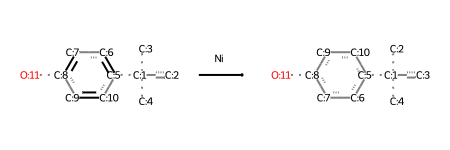

In [2]:
import pandas as pd
import rdkit
import rdkit.Chem as Chem
from rdkit.Chem import rdChemReactions
rdkit.RDLogger.DisableLog('rdApp.*')

s = '[C:1]([C:5]1[CH:10]=[CH:9][C:8]([OH:11])=[CH:7][CH:6]=1)([CH3:4])([CH3:3])[CH3:2]>[Ni]>[C:1]([CH:5]1[CH2:6][CH2:7][CH:8]([OH:11])[CH2:9][CH2:10]1)([CH3:4])([CH3:2])[CH3:3]'
rxn = rdChemReactions.ReactionFromSmarts(s)
rxn

In [12]:
for mol in rxn.GetReactants():
    [a.SetAtomMapNum(0) for a in mol.GetAtoms()]
    print(Chem.MolToSmiles(mol))
for mol in rxn.GetProducts():
    [a.SetAtomMapNum(0) for a in mol.GetAtoms()]
    print(Chem.MolToSmiles(mol))

CC(C)(C)C1=CC=C(O)C=C1
CC(C)(C)C1CCC(O)CC1


In [3]:
uspto_df = pd.read_csv('/scratch/yujieq/uspto/1976_Sep2016_USPTOgrants_smiles.rsmi', sep='\t')
uspto_df

/data/rsg/nlp/yujieq/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ReactionSmiles,PatentNumber,ParagraphNum,Year,TextMinedYield,CalculatedYield
0,[Br:1][CH2:2][CH2:3][OH:4].[CH2:5]([S:7](Cl)(=...,US03930836,NaN,1976,NaN,NaN
1,[Br:1][CH2:2][CH2:3][CH2:4][OH:5].[CH3:6][S:7]...,US03930836,NaN,1976,NaN,NaN
2,[CH2:1]([Cl:4])[CH2:2][OH:3].CCOCC.[CH2:10]([S...,US03930836,NaN,1976,NaN,NaN
3,[Br:1][CH2:2][CH2:3][OH:4].[CH2:5]([S:7](Cl)(=...,US03930839,NaN,1976,NaN,NaN
4,[Br:1][CH2:2][CH2:3][CH2:4][OH:5].[CH3:6][S:7]...,US03930839,NaN,1976,NaN,NaN
...,...,...,...,...,...,...
1808932,Br[C:2]1[CH:3]=[CH:4][C:5]2[NH:6][C:7]3[C:12](...,US09450188B2,551,2016,59%,NaN
1808933,Br[C:2]1[CH:7]=[CH:6][C:5]([C:8]2[C:9]3[C:14](...,US09450188B2,556,2016,80%,77.4%
1808934,Br[C:2]1[CH:7]=[CH:6][C:5]([C:8]2[CH:21]=[CH:2...,US09450188B2,574,2016,61%,NaN
1808935,Br[C:2]1[CH:3]=[C:4]([C:8]2[CH:21]=[CH:20][C:1...,US09450188B2,608,2016,70%,69.5%


In [ ]:
import multiprocessing
from tqdm import tqdm

def load_reactions(smiles):
    mols = []
    try:
        rxn = rdChemReactions.ReactionFromSmarts(smiles)
        for mol in rxn.GetReactants():
            [a.SetAtomMapNum(0) for a in mol.GetAtoms()]
            mols.append(Chem.MolToSmiles(mol))
        for mol in rxn.GetProducts():
            [a.SetAtomMapNum(0) for a in mol.GetAtoms()]
            mols.append(Chem.MolToSmiles(mol))
    except:
        pass
    return mols

# with multiprocessing.Pool(32) as p:
#     results = p.imap(load_reactions, uspto_df['ReactionSmiles'], chunksize=128)

results = []
for smiles in tqdm(uspto_df['ReactionSmiles']):
    results += load_reactions(smiles)
    
# results = sum(results, [])
print(len(results))

In [12]:
uspto_set = set(results)

In [15]:
df = pd.read_csv('../data/molbank/indigo-data/train.csv')
count = sum([s in uspto_set for s in df['SMILES']])
print(count)

43934
